<a href="https://colab.research.google.com/github/tylerjmwhit/Maching_learning_pratice_notebooks/blob/main/Week14assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras import layers, models
from tensorflow.keras.datasets.mnist import load_data

In [ ]:
!pip install yfinance
from yfinance import ticker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.4 MB 11.8 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


Exercise 1:

Train an RNN on the stock data that we did in an earlier lab. Try to predict the closed column with an input sequence of 10, 20 and 50 previous closed values.

In [ ]:
tk = ticker.Ticker('NVDA')
df = tk.history(period = 'max').reset_index()
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1999-01-22,0.401824,0.448464,0.356379,0.376709,271468800.0,0.0,0.0
1,1999-01-25,0.406607,0.420958,0.376709,0.416175,51048000.0,0.0,0.0
2,1999-01-26,0.420958,0.429329,0.377905,0.383885,34320000.0,0.0,0.0
3,1999-01-27,0.385081,0.394649,0.363554,0.382690,24436800.0,0.0,0.0
4,1999-01-28,0.382690,0.385081,0.379101,0.381494,22752000.0,0.0,0.0
...,...,...,...,...,...,...,...,...
5873,2022-05-23,162.740005,169.149994,161.789993,168.979996,63988900.0,0.0,0.0
5874,2022-05-24,165.100006,165.970001,157.800003,161.539993,58855000.0,0.0,0.0
5875,2022-05-25,160.199997,171.110001,160.000000,169.750000,78113200.0,0.0,0.0
5876,2022-05-26,160.360001,180.919998,160.220001,178.509995,99657500.0,0.0,0.0


In [ ]:
df = df.dropna(axis = 0)
df = df.reset_index(drop=True)

In [ ]:
model = models.Sequential()
model.add(layers.InputLayer(input_shape=(20,4)))
model.add(layers.GRU(50))
model.add(layers.Dense(4, activation=None))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 50)                8400      
                                                                 
 dense_1 (Dense)             (None, 4)                 204       
                                                                 
Total params: 8,604
Trainable params: 8,604
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cols = ['Open','High','Low','Close']
inputs, outputs = [], []
for i in range(len(df)-20):
  inputs.append(df.loc[i:i+19, cols])
  outputs.append(df.loc[i+20, cols])

In [ ]:
model.compile(optimizer='adam',loss='mse')
model.fit(np.array(inputs).astype(float), np.array(outputs).astype(float), epochs=70)

Epoch 1/70
184/184 [==============================] - 7s 4ms/step - loss: 3240.1736
Epoch 2/70
184/184 [==============================] - 1s 4ms/step - loss: 2868.3792
Epoch 3/70
184/184 [==============================] - 1s 4ms/step - loss: 2573.7046
Epoch 4/70
184/184 [==============================] - 1s 4ms/step - loss: 2321.0793
Epoch 5/70
184/184 [==============================] - 1s 4ms/step - loss: 2109.6902
Epoch 6/70
184/184 [==============================] - 1s 4ms/step - loss: 1922.5427
Epoch 7/70
184/184 [==============================] - 1s 4ms/step - loss: 1770.0142
Epoch 8/70
184/184 [==============================] - 1s 4ms/step - loss: 1632.0077
Epoch 9/70
184/184 [==============================] - 1s 4ms/step - loss: 1506.4921
Epoch 10/70
184/184 [==============================] - 1s 4ms/step - loss: 1390.5499
Epoch 11/70
184/184 [==============================] - 1s 4ms/step - loss: 1281.7233
Epoch 12/70
184/184 [==============================] - 1s 4ms/step - loss:

In [ ]:
input_10, input_20 = [] , []
input_10 = df.loc[100:110 , cols]
input_20 = df.loc[120:139, cols]
input_pad = np.zeros((9,4))
input_10

,Open,High,Low,Close
100,0.330069,0.344420,0.325286,0.334853
101,0.332461,0.337245,0.325286,0.325286
102,0.327678,0.327678,0.313327,0.313327
103,0.322894,0.330069,0.314223,0.330069
104,0.330069,0.330069,0.316914,0.324090
105,0.320502,0.330069,0.316914,0.330069
106,0.332461,0.332461,0.320502,0.322894
107,0.320502,0.331265,0.320502,0.327678
108,0.338441,0.338441,0.325286,0.332461
109,0.337245,0.340833,0.332461,0.336049


In [ ]:
input_10 = np.array(input_10)
input_20 = np.array(input_20)
input_10


array([[0.3300694 , 0.34442024, 0.32528611, 0.3348527 ],
       [0.33246102, 0.33724524, 0.32528606, 0.32528606],
       [0.32767774, 0.32767774, 0.3133269 , 0.3133269 ],
       [0.32289441, 0.33006936, 0.31422327, 0.33006936],
       [0.33006934, 0.33006934, 0.31691433, 0.32409021],
       [0.32050182, 0.33006936, 0.31691435, 0.33006936],
       [0.3324611 , 0.3324611 , 0.32050189, 0.32289448],
       [0.32050184, 0.33126522, 0.32050184, 0.32767773],
       [0.33844105, 0.33844105, 0.32528604, 0.332461  ],
       [0.33724527, 0.34083274, 0.33246105, 0.33604851],
       [0.34681191, 0.36594698, 0.33963695, 0.36594698]])

In [ ]:
input_10 = np.append(input_pad, input_10)
input_10.shape

(80,)

In [ ]:
pred_10 = model.predict(input_10.reshape(1,20,4))
pred_20 = model.predict(input_20.reshape(1,20,4))

In [ ]:
actual_10 = df.loc[111,cols]
actual_20 = df.loc[140,cols]
actual_10

Open     0.365947
High     0.365947
Low      0.327678
Close    0.346812
Name: 111, dtype: object

In [ ]:
print(pred_10,np.array(actual_10))
print(pred_20,np.array(actual_20))

[[0.31739092 0.2754035  0.30029488 0.33326292]] [0.3659468647625153 0.3659468647625153 0.3276776409055401
 0.34681180119514465]
[[0.4069724  0.38098    0.3895378  0.46078348]] [0.420957747985286 0.4496594343938769 0.41856611414095746
 0.4388970136642456]


Overall this model was not very good at predicting data. However with some fine tuning I might be able to get a more accurate model

Excersie 2:
Generally an RNN accepts a sequence of vectors as an input.
A grayscale image can also be considered a sequence of rows of pixels.
Train two RNN on the MNIST dataset, where one uses an LSTM cell and the other a GRU cell. Run the necessary steps to compare the results

In [ ]:
(x_train, y_train), (x_test, y_test) = load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit(y_train.reshape(-1,1))
y_train = enc.transform(y_train.reshape(-1,1)).toarray()
y_test = enc.transform(y_test.reshape(-1,1)).toarray()

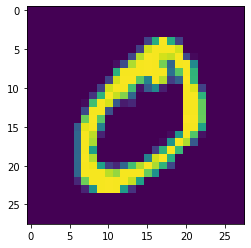

In [ ]:
plt.imshow(x_train[1])

In [ ]:
from keras.backend import softmax
model_gru = models.Sequential()
model_gru.add(layers.InputLayer(input_shape=(28,28)))
model_gru.add(layers.GRU(50))
model_gru.add(layers.Dense(10, activation='softmax'))

In [ ]:
model_lstm = models.Sequential()
model_lstm.add(layers.InputLayer(input_shape=(28,28)))
model_lstm.add(layers.LSTM(50))
model_lstm.add(layers.Dense(10, activation='softmax'))

In [ ]:
model_gru.compile(optimizer='adam',loss='CategoricalCrossentropy')
model_gru.fit(x_train, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 9s 4ms/step - loss: 0.9154
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6110
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5295
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4990
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4666
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4502
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4299
Epoch 8/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4096
Epoch 9/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4054
Epoch 10/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3982
Epoch 11/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3873
Epoch 12/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3822
E

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 7523491238973769990
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14465892352
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 13774831120909551066
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [ ]:
model_lstm.compile(optimizer='adam',loss='CategoricalCrossentropy')
model_lstm.fit(x_train, y_train, epochs=100)

Epoch 1/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7402
Epoch 2/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4446
Epoch 3/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3785
Epoch 4/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3503
Epoch 5/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3227
Epoch 6/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3012
Epoch 7/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2879
Epoch 8/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2750
Epoch 9/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2645
Epoch 10/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2567
Epoch 11/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2515
Epoch 12/100
1875/1875 [==============================] - 7s 4ms/step - lo

In [ ]:
preds_gru = model_gru.predict(x_test)
preds_lstm = model_lstm.predict(x_test)

In [ ]:
preds_gru = enc.inverse_transform(preds_gru)
preds_lstm = enc.inverse_transform(preds_lstm)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print("classification report + confusion matrix for GRU model")
print(classification_report(enc.inverse_transform(y_test),preds_gru))
print(confusion_matrix(enc.inverse_transform(y_test),preds_gru))

classification report + confusion matrix for GRU model
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       980
           1       0.96      0.97      0.96      1135
           2       0.91      0.89      0.90      1032
           3       0.86      0.89      0.88      1010
           4       0.88      0.84      0.86       982
           5       0.90      0.88      0.89       892
           6       0.89      0.97      0.93       958
           7       0.89      0.88      0.89      1028
           8       0.83      0.82      0.83       974
           9       0.85      0.81      0.83      1009

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

[[ 878    0    3    7    1    1   14    0   76    0]
 [   0 1099    6    3    9    4   10    1    2    1]
 [   7    5  917   42    9    6   29    5   11    1]
 [   1    2   34  901    2 

In [ ]:
print("classification report + confusion matrix for LSTM model")
print(classification_report(enc.inverse_transform(y_test),preds_lstm))
print(confusion_matrix(enc.inverse_transform(y_test),preds_lstm))

classification report + confusion matrix for LSTM model
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.94      0.95      0.94      1032
           3       0.91      0.94      0.93      1010
           4       0.90      0.92      0.91       982
           5       0.94      0.89      0.92       892
           6       0.97      0.97      0.97       958
           7       0.92      0.92      0.92      1028
           8       0.94      0.92      0.93       974
           9       0.89      0.87      0.88      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000

[[ 959    0    3    2    1    2    3    0   10    0]
 [   0 1116    7    1    2    2    2    1    2    2]
 [   3    5  981   11    5    4    4    7    9    3]
 [   1    2   19  948    0

It looks like the LSTM version was able to about a 4% higher f1-score compared to the GRU version. This makes sense since the LSTM version has a longer "memory" so should be able to interpet the 28 lines of the array in a more significant way. More epochs on both of these models might help improve their predicition capabilites